# StarAgile Assignment on Statistics and Data Analysis Level-1 

## Statistics & Data Analysis Module Assignment

- Do a full End- to-End Project with a use-case of your choice from Web Scraping till Data Visualization

Approach You Can Follow :

- Decide a use-case or problem statement to work upon

- Do web scraping on the topic from official sources, websites or social media data

- Sort and organize the dataset from the information gathered through the resources

- Do analysis and present visualizations on the dataset while gathering better understandings and insights from it

- Give an overall summary for the problem statement along with justifiable pointers

* What Kind Of Approach You Could Follow for your Problem Statements :

- Scraping the Web, Pre-Processing, Data Cleaning, Exploratory Data Analysis and Data Visualizations

- Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


# Assignment Submitted by VINAY M on 03-09-2023

### I have done the WebScrapping of Weather Data of Indian Capital Cities from Google Weather and performed a compartive studies

In [1]:
# state name extraction from https://chimesradio.com/parenting-blogs/states-and-capitals-of-india/

In [2]:
#importing libraries for scraping and EDA
from bs4 import BeautifulSoup
import requests
from requests_file import FileAdapter
import urllib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%d/%m/%Y %H:%M:%S")

In [3]:
baseurl = "https://chimesradio.com/parenting-blogs/states-and-capitals-of-india/"
result = requests.get(baseurl).content
soup = BeautifulSoup(result, 'html.parser')

In [4]:
div_element = soup.find('div', class_='elementor-column elementor-col-50 elementor-top-column elementor-element elementor-element-5445498')

In [5]:
table_element = div_element.find('table')

In [6]:
data = []

# Extract table rows
rows = table_element.find_all('tr')

# Iterate through rows
for row in rows:
    # Extract table data (cell values)
    cells = row.find_all('td')
    row_data = [cell.get_text() for cell in cells]
    
    # Append row data to the data list
    data.append(row_data)

# Create a Pandas DataFrame from the extracted data
df = pd.DataFrame(data, columns=['S_N', 'State', 'Capitals'])
df.drop(index=0, inplace=True)
df.set_index("S_N", inplace=True)
# Print the DataFrame (replace this with your desired actions)
df.loc[df['State'] == 'Andhra Pradesh', 'Capitals'] = "Vizag"

In [7]:
df

,State,Capitals
S_N,,
1,Andhra Pradesh,Vizag
2,Arunachal Pradesh,Itanagar
3,Assam,Dispur
4,Bihar,Patna
5,Chhattisgarh,Raipur
6,Goa,Panaji
7,Gujarat,Gandhinagar
8,Haryana,Chandigarh
9,Himachal Pradesh,Shimla


In [8]:
head = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36' }
Weather_Data = pd.DataFrame(columns=['Cities', 'DateTime', 'Temperature', 'Precipitation', 'Humidity', 'Wind', 'Sky'])

for city in df["Capitals"]:
    search = "Weather+in+{}".format(city)
    lang = "hl=en&gl=en"
    url = f"http://www.google.com/search?q={search}&{lang}"
    # Setup requests local file adapter for fetching local files
    googlepage = requests.Session()
    googlepage.mount('file://', FileAdapter())

    # Send HTTP request. 
    # Pull HTTP data from internet or local file
    scrapped = googlepage.get(url, headers=head)
    # Parse the HTML received
    soup = BeautifulSoup(scrapped.content) 

    # Clean up the html for viewing (this is for debugging 
    # and figuring out the right class names etc. to extract from)
    # prettyhtml = soup.prettify()
    # Weather Time
    dateTime = soup.find('div', class_='wob_dts').get_text(strip=True)
    # Find the temperature data in Celsius
    temp = soup.find('span', attrs={'id': 'wob_tm'}).text
    # Find the precipitation chance data in %
    precip = soup.find('span', attrs={'id': 'wob_pp'}).text
    # Find the humidity in %
    humid = soup.find('span', attrs={'id': 'wob_hm'}).text
    # Find the wind speed in km/h
    wind = soup.find('span', attrs={'id': 'wob_ws'}).text
    # Sky Information
    sky = soup.find('span', id='wob_dc').get_text(strip=True)
    
    
    #total_states = df.shape[0]
    #for i in range(total_states):
    Weather_Data = Weather_Data.append(
    {
        'Cities' : city,
        'DateTime' : dateTime,
        'Temperature' : temp,
        'Precipitation' : precip,
        'Humidity': humid,
        'Wind' : wind,
        'Sky' : sky
    }, ignore_index=True)
print("---- Displaying Weather Statistics on Indian Capital Cities------")
print(f"---------Weather Reporting Date and Time: {date_time}-----------")
Weather_Data

---- Displaying Weather Statistics on Indian Capital Cities------
---------Weather Reporting Date and Time: 03/09/2023 12:16:18-----------


,Cities,DateTime,Temperature,Precipitation,Humidity,Wind,Sky
0,Vizag,"Sunday, 12:00 pm",32,21%,66%,11 km/h,Haze
1,Itanagar,"Sunday, 12:00 pm",36,2%,64%,5 km/h,Mostly Sunny
2,Dispur,"Sunday, 12:00 pm",34,6%,67%,11 km/h,Haze
3,Patna,"Sunday, 12:00 pm",31,51%,91%,5 km/h,Rain
4,Raipur,"Sunday, 12:00 pm",27,11%,87%,0 km/h,Scattered Thunderstorms
5,Panaji,"Sunday, 12:00 pm",31,10%,72%,6 km/h,Partly Cloudy
6,Gandhinagar,"Sunday, 12:00 pm",32,17%,59%,8 km/h,Partly Cloudy
7,Chandigarh,"Sunday, 12:00 pm",34,4%,59%,11 km/h,Mostly Sunny
8,Shimla,"Sunday, 12:00 pm",20,15%,70%,10 km/h,Mostly Sunny
9,Ranchi,"Sunday, 12:00 pm",31,93%,73%,11 km/h,Haze


In [12]:
#saving pandas frame
scapeTime = now.strftime("%d-%m-%Y-%H-%M-%S")
outputFilename = f'Google-Weather-{scapeTime}'
Weather_Data.to_csv(f'{outputFilename}.csv')

In [13]:
# Cleaning Data for EDA

In [14]:
Weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cities         28 non-null     object
 1   DateTime       28 non-null     object
 2   Temperature    28 non-null     object
 3   Precipitation  28 non-null     object
 4   Humidity       28 non-null     object
 5   Wind           28 non-null     object
 6   Sky            28 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


In [15]:
# Cleaning %, km/h for Descriptive Statistics

In [21]:
def remove_percentage(column_value):
    return column_value.replace("%","")

def remove_kmph(column_value):
    return column_value.replace(" km/h","")

In [17]:
Weather_Data_Cleaned = Weather_Data.copy()

In [22]:
Weather_Data_Cleaned['Precipitation'] = Weather_Data_Cleaned['Precipitation'].apply(remove_percentage)
Weather_Data_Cleaned['Humidity'] = Weather_Data_Cleaned['Humidity'].apply(remove_percentage)
Weather_Data_Cleaned['Wind'] = Weather_Data_Cleaned['Wind'].apply(remove_kmph)

In [23]:
Weather_Data_Cleaned

,Cities,DateTime,Temperature,Precipitation,Humidity,Wind,Sky
0,Vizag,"Sunday, 12:00 pm",32,21,66,11,Haze
1,Itanagar,"Sunday, 12:00 pm",36,2,64,5,Mostly Sunny
2,Dispur,"Sunday, 12:00 pm",34,6,67,11,Haze
3,Patna,"Sunday, 12:00 pm",31,51,91,5,Rain
4,Raipur,"Sunday, 12:00 pm",27,11,87,0,Scattered Thunderstorms
5,Panaji,"Sunday, 12:00 pm",31,10,72,6,Partly Cloudy
6,Gandhinagar,"Sunday, 12:00 pm",32,17,59,8,Partly Cloudy
7,Chandigarh,"Sunday, 12:00 pm",34,4,59,11,Mostly Sunny
8,Shimla,"Sunday, 12:00 pm",20,15,70,10,Mostly Sunny
9,Ranchi,"Sunday, 12:00 pm",31,93,73,11,Haze


In [24]:
# type casting all columns

In [27]:
Weather_Data_Cleaned['Cities'] = Weather_Data_Cleaned['Cities'].astype('category')
Weather_Data_Cleaned['DateTime'] = Weather_Data_Cleaned['DateTime'].astype('str')
Weather_Data_Cleaned['Temperature'] = Weather_Data_Cleaned['Temperature'].astype('float')
Weather_Data_Cleaned['Precipitation'] = Weather_Data_Cleaned['Precipitation'].astype('float')
Weather_Data_Cleaned['Humidity'] = Weather_Data_Cleaned['Humidity'].astype('float')
Weather_Data_Cleaned['Wind'] = Weather_Data_Cleaned['Wind'].astype('float')
Weather_Data_Cleaned['Sky'] = Weather_Data_Cleaned['Sky'].astype('category')
Weather_Data_Cleaned

,Cities,DateTime,Temperature,Precipitation,Humidity,Wind,Sky
0,Vizag,"Sunday, 12:00 pm",32.0,21.0,66.0,11.0,Haze
1,Itanagar,"Sunday, 12:00 pm",36.0,2.0,64.0,5.0,Mostly Sunny
2,Dispur,"Sunday, 12:00 pm",34.0,6.0,67.0,11.0,Haze
3,Patna,"Sunday, 12:00 pm",31.0,51.0,91.0,5.0,Rain
4,Raipur,"Sunday, 12:00 pm",27.0,11.0,87.0,0.0,Scattered Thunderstorms
5,Panaji,"Sunday, 12:00 pm",31.0,10.0,72.0,6.0,Partly Cloudy
6,Gandhinagar,"Sunday, 12:00 pm",32.0,17.0,59.0,8.0,Partly Cloudy
7,Chandigarh,"Sunday, 12:00 pm",34.0,4.0,59.0,11.0,Mostly Sunny
8,Shimla,"Sunday, 12:00 pm",20.0,15.0,70.0,10.0,Mostly Sunny
9,Ranchi,"Sunday, 12:00 pm",31.0,93.0,73.0,11.0,Haze


In [42]:
# Dropping Duplicates
Weather_Data_Cleaned.drop_duplicates(inplace = True)

In [48]:
# Detecting Null Values
Weather_Data_Cleaned.isna().sum()

Cities           0
DateTime         0
Temperature      0
Precipitation    0
Humidity         0
Wind             0
Sky              0
dtype: int64

In [43]:
Weather_Data_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 27
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Cities         27 non-null     category
 1   DateTime       27 non-null     object  
 2   Temperature    27 non-null     float64 
 3   Precipitation  27 non-null     float64 
 4   Humidity       27 non-null     float64 
 5   Wind           27 non-null     float64 
 6   Sky            27 non-null     category
dtypes: category(2), float64(4), object(1)
memory usage: 2.9+ KB


In [44]:
# Descriptive Statictics of Weather
Weather_Data_Cleaned.describe()

,Temperature,Precipitation,Humidity,Wind
count,27.000000,27.000000,27.000000,27.000000
mean,30.296296,25.000000,68.370370,8.000000
std,3.708771,28.202564,10.209905,4.169486
min,20.000000,0.000000,46.000000,0.000000
25%,27.500000,5.500000,62.500000,5.000000
50%,31.000000,16.000000,68.000000,8.000000
75%,32.500000,27.500000,74.000000,11.000000
max,36.000000,93.000000,91.000000,16.000000


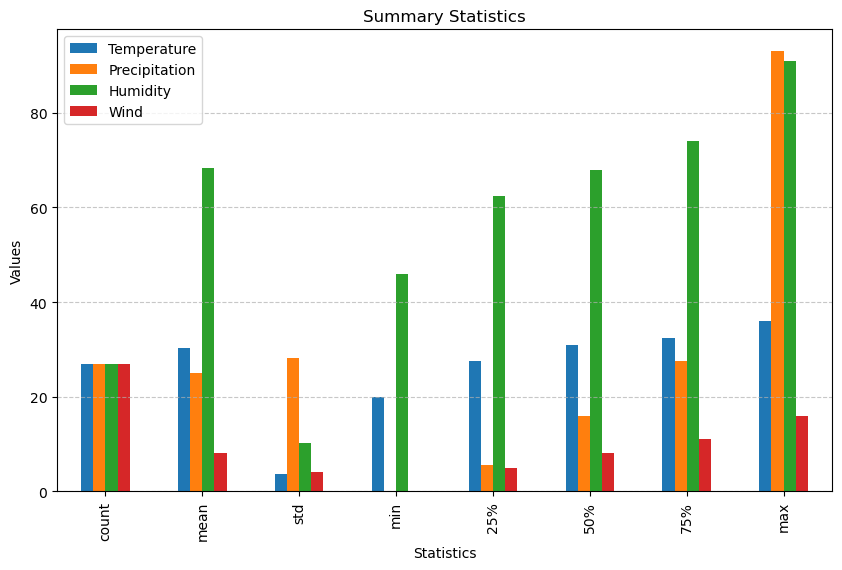

In [45]:
# Use describe() to get summary statistics
summary_stats = Weather_Data_Cleaned.describe()

# Plot the summary statistics using Matplotlib
summary_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [32]:
# Top Five Highest Temperature Cities

In [46]:
top5HotCities = Weather_Data_Cleaned.nlargest(5, "Temperature")
top5HotCities

,Cities,DateTime,Temperature,Precipitation,Humidity,Wind,Sky
1,Itanagar,"Sunday, 12:00 pm",36.0,2.0,64.0,5.0,Mostly Sunny
25,Lucknow,"Sunday, 12:00 pm",36.0,1.0,51.0,13.0,Haze
2,Dispur,"Sunday, 12:00 pm",34.0,6.0,67.0,11.0,Haze
7,Chandigarh,"Sunday, 12:00 pm",34.0,4.0,59.0,11.0,Mostly Sunny
20,Jaipur,"Sunday, 12:00 pm",34.0,0.0,46.0,14.0,Haze


In [49]:
least5ChillCities = Weather_Data_Cleaned.nsmallest(5, "Temperature")
least5ChillCities

,Cities,DateTime,Temperature,Precipitation,Humidity,Wind,Sky
8,Shimla,"Sunday, 12:00 pm",20.0,15.0,70.0,10.0,Mostly Sunny
21,Gangtok,"Sunday, 12:00 pm",24.0,46.0,77.0,2.0,Mostly Sunny
15,Shillong,"Sunday, 12:00 pm",26.0,17.0,68.0,5.0,Mostly Cloudy
4,Raipur,"Sunday, 12:00 pm",27.0,11.0,87.0,0.0,Scattered Thunderstorms
10,Bengaluru,"Sunday, 12:00 pm",27.0,1.0,62.0,8.0,Mostly Cloudy


In [50]:
top5RainyCities = Weather_Data_Cleaned.nlargest(5, "Precipitation")
top5RainyCities

,Cities,DateTime,Temperature,Precipitation,Humidity,Wind,Sky
9,Ranchi,"Sunday, 12:00 pm",31.0,93.0,73.0,11.0,Haze
23,Hyderabad,"Sunday, 12:00 pm",28.0,89.0,77.0,16.0,Haze
13,Mumbai,"Sunday, 12:00 pm",28.0,85.0,81.0,8.0,Haze
11,Thiruvananthapuram,"Sunday, 12:00 pm",29.0,69.0,78.0,8.0,Mostly Cloudy
3,Patna,"Sunday, 12:00 pm",31.0,51.0,91.0,5.0,Rain


In [51]:
least5nonRainyCities = Weather_Data_Cleaned.nsmallest(5, "Precipitation")
least5nonRainyCities

,Cities,DateTime,Temperature,Precipitation,Humidity,Wind,Sky
20,Jaipur,"Sunday, 12:00 pm",34.0,0.0,46.0,14.0,Haze
10,Bengaluru,"Sunday, 12:00 pm",27.0,1.0,62.0,8.0,Mostly Cloudy
25,Lucknow,"Sunday, 12:00 pm",36.0,1.0,51.0,13.0,Haze
1,Itanagar,"Sunday, 12:00 pm",36.0,2.0,64.0,5.0,Mostly Sunny
7,Chandigarh,"Sunday, 12:00 pm",34.0,4.0,59.0,11.0,Mostly Sunny


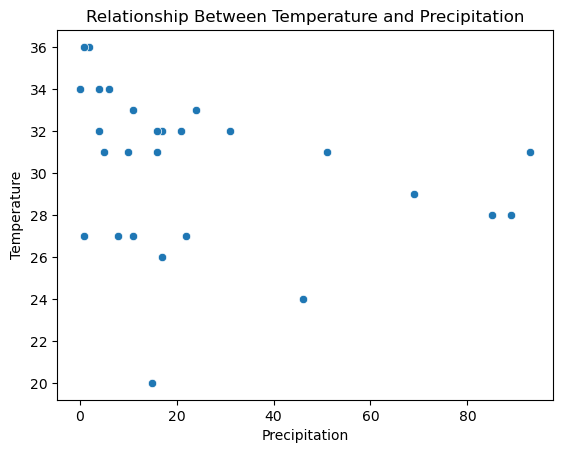

In [53]:
# Coorelation between Temperature and Precipitation
x = Weather_Data_Cleaned['Precipitation']
y = Weather_Data_Cleaned['Temperature']

# Create a scatter plot
sns.scatterplot(x=x, y=y)

# Add labels and a title
plt.xlabel('Precipitation')
plt.ylabel('Temperature')
plt.title('Relationship Between Temperature and Precipitation')

# Show the plot
plt.show()

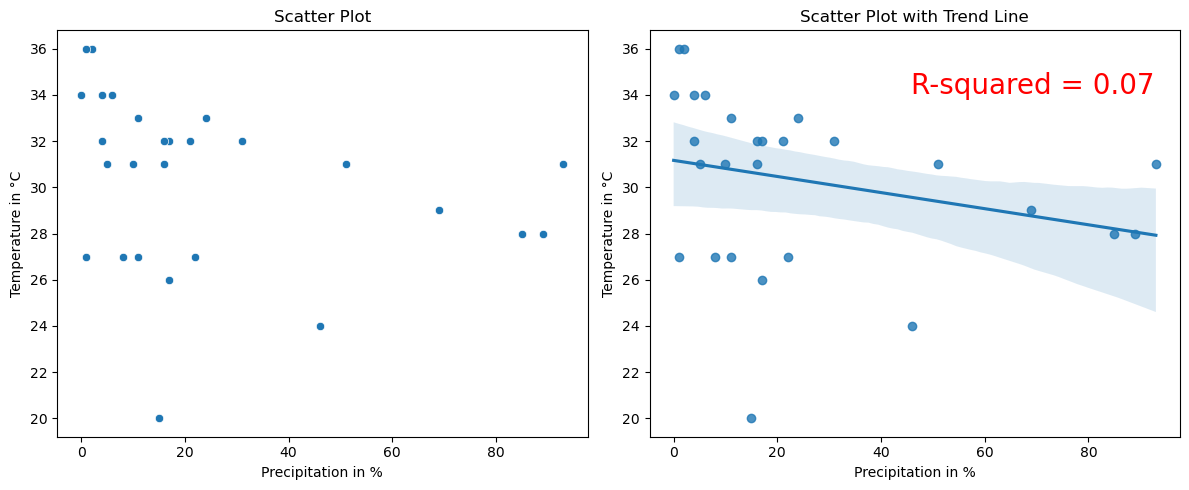

In [94]:
x = Weather_Data_Cleaned['Precipitation']
y = Weather_Data_Cleaned['Temperature']

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatter plot in the first subplot
degree_symbol = '\u00B0'
sns.scatterplot(x=x, y=y, ax=axes[0])
axes[0].set_xlabel('Precipitation in %')
axes[0].set_ylabel(f'Temperature in {degree_symbol}C')
axes[0].set_title('Scatter Plot')

# Plot the second scatter plot in the second subplot
sns.regplot(x=x, y=y, ci=95, ax=axes[1])

# Calculate the R-squared value
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept
r2 = r2_score(y, y_pred)

# Add the R-squared value to the plot
text = f'R-squared = {r2:.2f}'
x_position = max(x) - 0.2  # Adjust the x-coordinate
y_position = max(y) - 1    # Adjust the y-coordinate
# Add text to the plot
plt.text(x_position, y_position, text, fontsize=20, color='red', ha='right', va='top')

axes[1].set_xlabel('Precipitation in %')
axes[1].set_ylabel(f'Temperature in {degree_symbol}C')
axes[1].set_title('Scatter Plot with Trend Line')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Generating Trend Line by eliminating the Outliers
- RANSAC (Random Sample Consensus) regression is a statistical algorithm used for robust linear regression in the presence of outliers and noisy data.
- The primary goal of RANSAC regression is to fit a regression model to a dataset while automatically identifying and ignoring data points that do not conform to the underlying linear relationship.

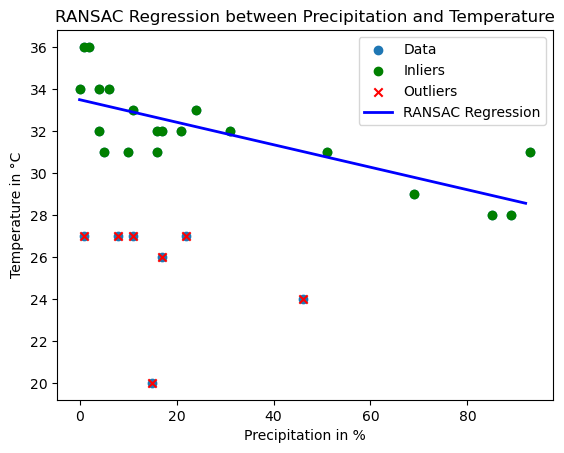

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

X = Weather_Data_Cleaned['Precipitation']
y = Weather_Data_Cleaned['Temperature']

# Create a scatter plot of the data
plt.scatter(X, y, label='Data')

# Create a RANSACRegressor model
ransac = RANSACRegressor()

# Reshape X into a 2D array
X = X.values.reshape(-1, 1)  # Use .values to convert to a NumPy array

# Fit the model to the data
ransac.fit(X, y)

# Get inliers and outliers
inliers_mask = ransac.inlier_mask_
outliers_mask = np.logical_not(inliers_mask)

# Plot the inliers and outliers
plt.scatter(X[inliers_mask], y[inliers_mask], color='green', marker='o', label='Inliers')
plt.scatter(X[outliers_mask], y[outliers_mask], color='red', marker='x', label='Outliers')

# Plot the RANSAC regression line
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = ransac.predict(line_X)
plt.plot(line_X, line_y, color='blue', linewidth=2, label='RANSAC Regression')

# Add labels and a legend
degree_symbol = '\u00B0'  # Degree symbol
plt.xlabel('Precipitation in %')
plt.ylabel(f'Temperature in {degree_symbol}C')
plt.legend()
plt.title('RANSAC Regression between Precipitation and Temperature')

# Show the plot
plt.show()

In [77]:
# Extraction of R-Square 
from sklearn.metrics import r2_score

# Calculate the R-squared value for the inliers
inlier_predictions = ransac.predict(X[inliers_mask])
r2 = r2_score(y[inliers_mask], inlier_predictions)

print("R-squared (inliers):", r2)

R-squared (inliers): 0.5892732676292631


In [95]:
# Conclusion: Correlation between the Precipitaion and Temperature revealed that there is an negative relationship between those variables
# Cities having higher temperature tends to recieve low precipitaiton and vice versa

In [96]:
# Classifying Sky Categories

In [98]:
Weather_Data_Cleaned['Sky'].nunique()

8

In [99]:
Weather_Data_Cleaned['Sky'].unique()

['Haze', 'Mostly Sunny', 'Rain', 'Scattered Thunderstorms', 'Partly Cloudy', 'Mostly Cloudy', 'Sunny', 'Fog']
Categories (8, object): ['Fog', 'Haze', 'Mostly Cloudy', 'Mostly Sunny', 'Partly Cloudy', 'Rain', 'Scattered Thunderstorms', 'Sunny']

In [104]:
SkyCategories = list(Weather_Data_Cleaned['Sky'].unique())

In [105]:
SkyCategories

['Haze',
 'Mostly Sunny',
 'Rain',
 'Scattered Thunderstorms',
 'Partly Cloudy',
 'Mostly Cloudy',
 'Sunny',
 'Fog']

In [111]:
# Group Table to Segregate the Cities According to Sky Type

In [118]:
grouped = Weather_Data_Cleaned.groupby('Sky')

# Perform operations on the groups
for name, group in grouped:
    print(f"Sky: {name}")
    print(group)
    print()

Sky: Fog
      Cities          DateTime  Temperature  Precipitation  Humidity  Wind  \
24  Agartala  Sunday, 12:00 pm         32.0           16.0      75.0   0.0   

    Sky  
24  Fog  

Sky: Haze
         Cities          DateTime  Temperature  Precipitation  Humidity  Wind  \
0         Vizag  Sunday, 12:00 pm         32.0           21.0      66.0  11.0   
2        Dispur  Sunday, 12:00 pm         34.0            6.0      67.0  11.0   
9        Ranchi  Sunday, 12:00 pm         31.0           93.0      73.0  11.0   
13       Mumbai  Sunday, 12:00 pm         28.0           85.0      81.0   8.0   
16       Aizawl  Sunday, 12:00 pm         27.0           22.0      68.0   5.0   
18  Bhubaneswar  Sunday, 12:00 pm         33.0           24.0      68.0   5.0   
20       Jaipur  Sunday, 12:00 pm         34.0            0.0      46.0  14.0   
23    Hyderabad  Sunday, 12:00 pm         28.0           89.0      77.0  16.0   
25      Lucknow  Sunday, 12:00 pm         36.0            1.0      51.0  1

In [120]:
#Counting Cities based on Sky Categories
grouped = Weather_Data_Cleaned.groupby('Sky')['Cities'].count().reset_index()

In [121]:
grouped

,Sky,Cities
0,Fog,1
1,Haze,9
2,Mostly Cloudy,4
3,Mostly Sunny,5
4,Partly Cloudy,5
5,Rain,1
6,Scattered Thunderstorms,1
7,Sunny,1


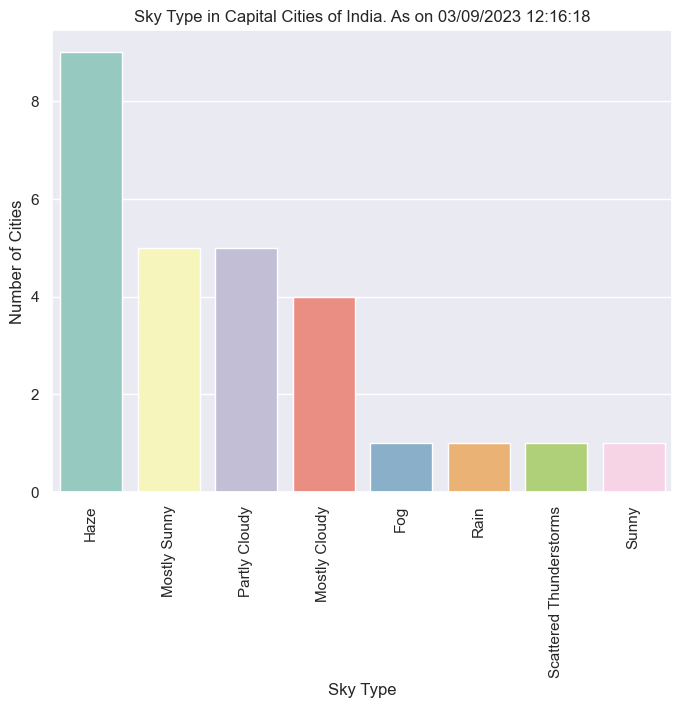

In [130]:
# Create a count plot using Seaborn
order = Weather_Data_Cleaned['Sky'].value_counts().index
sns.set(style="darkgrid")  # Optional: Set the plot style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.countplot(data=Weather_Data_Cleaned, x='Sky', palette="Set3", order=order)  # Create the count plot

plt.title(f'Sky Type in Capital Cities of India. As on {date_time}')  # Optional: Set a title
plt.xlabel('Sky Type')  # Optional: Set the X-axis label
plt.xticks(rotation=90)
plt.ylabel('Number of Cities')  # Optional: Set the Y-axis label
plt.show()  # Display the plot